<!--NAVIGATION-->
< [Defining and Using Functions](08-Defining-Functions.ipynb) | [Contents](0-Index.ipynb)

# Errors and Exceptions

No matter your skill as a programmer, you will eventually make a coding mistake.
Such mistakes come in three basic flavors:

- *Syntax errors:* Errors where the code is not valid Python (generally easy to fix)
- *Runtime errors:* Errors where syntactically valid code fails to execute, perhaps due to invalid user input (sometimes easy to fix)
- *Semantic errors:* Errors in logic: code executes without a problem, but the result is not what you expect (often very difficult to track-down and fix)

Here we're going to focus on how to deal cleanly with *runtime errors*.
As we'll see, Python handles runtime errors via its *exception handling* framework.

## Runtime Errors

If you've done any coding in Python, you've likely come across runtime errors.
They can happen in a lot of ways.

For example, if you try to reference an undefined variable:

In [1]:
print(Q)

NameError: name 'Q' is not defined

Or if you try an operation that's not defined:

In [2]:
1 + 'abc'

TypeError: unsupported operand type(s) for +: 'int' and 'str'

Or you might be trying to compute a mathematically ill-defined result:

In [3]:
2 / 0

ZeroDivisionError: division by zero

Or maybe you're trying to access a sequence element that doesn't exist:

In [4]:
L = [1, 2, 3]
L[1000]

IndexError: list index out of range

Note that in each case, Python is kind enough to not simply indicate that an error happened, but to spit out a *meaningful* exception that includes information about what exactly went wrong, along with the exact line of code where the error happened.
Having access to meaningful errors like this is immensely useful when trying to trace the root of problems in your code.

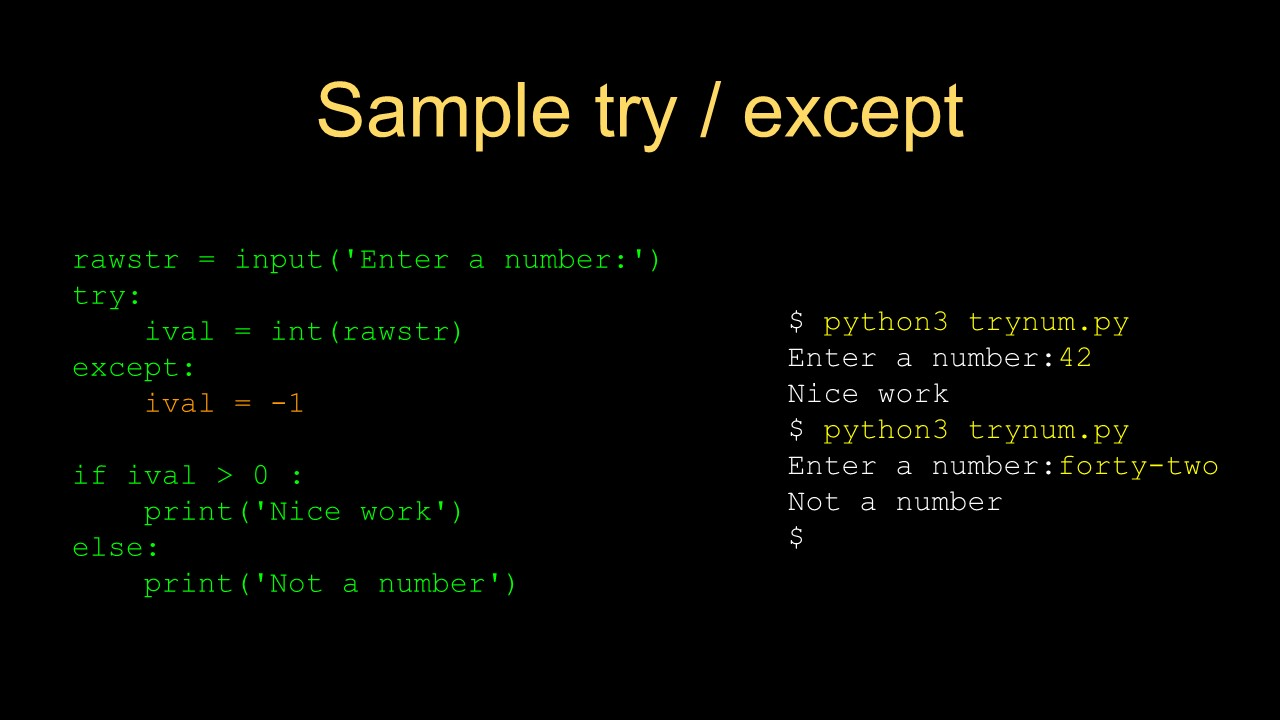

## Catching Exceptions: ``try`` and ``except``
The main tool Python gives you for handling runtime exceptions is the ``try``...``except`` clause.
Its basic structure is this:

In [7]:
try:
    print("this gets executed first")
except:
    print("this gets executed only if there is an error")

this gets executed first


Note that the second block here did not get executed: this is because the first block did not return an error.
Let's put a problematic statement in the ``try`` block and see what happens:

In [9]:
try:
    print("let's try something:")
    x = 1 / 0 # ZeroDivisionError
except:
    print("something bad happened!")

let's try something:
something bad happened!


Here we see that when the error was raised in the ``try`` statement (in this case, a ``ZeroDivisionError``), the error was caught, and the ``except`` statement was executed.

One way this is often used is to check user input within a function or another piece of code.
For example, we might wish to have a function that catches zero-division and returns some other value, perhaps a suitably large number like $10^{100}$:

In [10]:
def safe_divide(a, b):
    try:
        return a / b
    except:
        return 1E100

In [11]:
safe_divide(1, 2)

0.5

In [12]:
safe_divide(2, 0)

1e+100

There is a subtle problem with this code, though: what happens when another type of exception comes up? For example, this is probably not what we intended:

In [12]:
safe_divide (1, '2')

1e+100

Dividing an integer and a string raises a ``TypeError``, which our over-zealous code caught and assumed was a ``ZeroDivisionError``!
For this reason, it's nearly always a better idea to catch exceptions *explicitly*:

In [13]:
def safe_divide(a, b):
    try:
        return a / b
    except ZeroDivisionError:
        return 1E100

In [14]:
safe_divide(1, 0)

1e+100

In [15]:
safe_divide(1, '2')

TypeError: unsupported operand type(s) for /: 'int' and 'str'

We're now catching zero-division errors only, and letting all other errors pass through un-modified.

## Raising Exceptions: ``raise``
We've seen how valuable it is to have informative exceptions when using parts of the Python language.
It's equally valuable to make use of informative exceptions within the code you write, so that users of your code (foremost yourself!) can figure out what caused their errors.

The way you raise your own exceptions is with the ``raise`` statement. For example:

In [15]:
raise RuntimeError("my error message")

RuntimeError: my error message

As an example of where this might be useful, let's return to our ``fibonacci`` function that we defined previously:

In [16]:
def fibonacci(N):
    L = []
    a, b = 0, 1
    while len(L) < N:
        a, b = b, a + b
        L.append(a)
    return L

One potential problem here is that the input value could be negative.
This will not currently cause any error in our function, but we might want to let the user know that a negative ``N`` is not supported.
Errors stemming from invalid parameter values, by convention, lead to a ``ValueError`` being raised:

In [1]:
def fibonacci(N):
    if N < 0:
        raise ValueError("N must be non-negative")
    L = []
    a, b = 0, 1
    while len(L) < N:
        a, b = b, a + b
        L.append(a)
    return L

In [3]:
fibonacci(10)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

In [17]:
fibonacci(-10)

[]

Now the user knows exactly why the input is invalid, and could even use a ``try``...``except`` block to handle it!

In [18]:
N = -10
try:
    print("trying this...")
    print(fibonacci(N))
except ValueError:
    print("Bad value: need to do something else")

trying this...
[]


## Diving Deeper into Exceptions

Briefly, I want to mention here some other concepts you might run into.
I'll not go into detail on these concepts and how and why to use them, but instead simply show you the syntax so you can explore more on your own.

### Accessing the error message

Sometimes in a ``try``...``except`` statement, you would like to be able to work with the error message itself.
This can be done with the ``as`` keyword:

In [22]:
try:
    x = 1 / 0
except ZeroDivisionError as err:
    print("Error class is:  ", type(err))
    print("Error message is:", err)

Error class is:   <class 'ZeroDivisionError'>
Error message is: division by zero


With this pattern, you can further customize the exception handling of your function.

### Defining custom exceptions
In addition to built-in exceptions, it is possible to define custom exceptions through *class inheritance*.
For instance, if you want a special kind of ``ValueError``, you can do this:

In [23]:
class MySpecialError(ValueError):
    pass

raise MySpecialError("here's the message")

MySpecialError: here's the message

This would allow you to use a ``try``...``except`` block that only catches this type of error:

In [24]:
try:
    print("do something")
    raise MySpecialError("[informative error message here]")
except MySpecialError:
    print("do something else")

do something
do something else


You might find this useful as you develop more customized code.

## ``try``...``except``...``else``...``finally``
In addition to ``try`` and ``except``, you can use the ``else`` and ``finally`` keywords to further tune your code's handling of exceptions.
The basic structure is this:

In [25]:
try:
    print("try something here")
except:
    print("this happens only if it fails")
else:
    print("this happens only if it succeeds")
finally:
    print("this happens no matter what")

try something here
this happens only if it succeeds
this happens no matter what


The utility of ``else`` here is clear, but what's the point of ``finally``?
Well, the ``finally`` clause really is executed *no matter what*: I usually see it used to do some sort of cleanup after an operation completes.

<!--NAVIGATION-->
< [Defining and Using Functions](08-Defining-Functions.ipynb) | [Contents](0-Index.ipynb)